In [1]:
# Jovian Commit Essentials
# Please retain and execute this cell without modifying the contents for `jovian.commit` to work
!pip install jovian --upgrade -q
import jovian
jovian.utils.colab.set_colab_file_id('1JLt8nDv8k4paEi_racRpaqZncJkjnb3o')

     |████████████████████████████████| 71kB 2.0MB/s 


# Project Title - NETFLIX SHOWS ANALYSIS
*   Using Pandas
*   Plotting the charts


Course project submitted towards completion of the course [Data Analysis with Python: Zero to Pandas](zerotopandas.com) by JovianML.Got to learn a lot about pandas ,numpy andmatplotlib,seaborn. An end to end starter 6 weeks course to get into the field of Data Analysis.


This is the NETFLIX SHOWS Dataset (hosted on kaggle) used in this project. 
This dataset consists of tv shows and movies available on Netflix as of 2019. The dataset is collected from Flixable which is a third-party Netflix search engine.

In 2018, they released an interesting report which shows that the number of TV shows on Netflix has nearly tripled since 2010. The streaming service’s number of movies has decreased by more than 2,000 titles since 2010, while its number of TV shows has nearly tripled. It will be interesting to explore what all other insights can be obtained from the same dataset.

Questions this analysis sought to answer
1. Understanding what content is available in different countries
2. Identifying similar content by matching text-based features
3. Network analysis of Actors / Directors and find interesting insights
4. Is Netflix has increasingly focusing on TV rather than movies in recent years.

### How to run the code

This is an executable [*Jupyter notebook*](https://jupyter.org) hosted on [Jovian.ml](https://www.jovian.ml), a platform for sharing data science projects. You can run and experiment with the code in a couple of ways: *using free online resources* (recommended) or *on your own computer*.

#### Option 1: Running using free online resources (1-click, recommended)

The easiest way to start executing this notebook is to click the "Run" button at the top of this page, and select "Run on Binder". This will run the notebook on [mybinder.org](https://mybinder.org), a free online service for running Jupyter notebooks. You can also select "Run on Colab" or "Run on Kaggle".


#### Option 2: Running on your computer locally

1. Install Conda by [following these instructions](https://conda.io/projects/conda/en/latest/user-guide/install/index.html). Add Conda binaries to your system `PATH`, so you can use the `conda` command on your terminal.

2. Create a Conda environment and install the required libraries by running these commands on the terminal:

```
conda create -n zerotopandas -y python=3.8 
conda activate zerotopandas
pip install jovian jupyter numpy pandas matplotlib seaborn opendatasets --upgrade
```

3. Press the "Clone" button above to copy the command for downloading the notebook, and run it on the terminal. This will create a new directory and download the notebook. The command will look something like this:

```
jovian clone notebook-owner/notebook-id
```



4. Enter the newly created directory using `cd directory-name` and start the Jupyter notebook.

```
jupyter notebook
```

You can now access Jupyter's web interface by clicking the link that shows up on the terminal or by visiting http://localhost:8888 on your browser. Click on the notebook file (it has a `.ipynb` extension) to open it.


## Downloading the Dataset

Downloaded using the opendatasets python library from the kaggle repository

In [2]:
!pip install jovian opendatasets --upgrade --quiet

Let's begin by downloading the data, and listing the files within the dataset.

In [3]:

dataset_url = 'https://www.kaggle.com/shivamb/netflix-shows'

In [4]:
import opendatasets as od
od.download(dataset_url)

Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username: ritikchawla
Your Kaggle Key: ··········


100%|██████████| 971k/971k [00:00<00:00, 79.0MB/s]

The dataset has been downloaded and extracted.

In [5]:
# Change this
data_dir = './netflix-shows'

In [6]:
import os
os.listdir(data_dir)

['netflix_titles.csv']

Let us save and upload our work to Jovian before continuing.

In [7]:
project_name = "zerotopandas-course-project" 

In [8]:
!pip install jovian --upgrade -q

In [9]:
import jovian

In [10]:
jovian.commit(project=project_name)

[jovian] Detected Colab notebook...
[jovian] Please enter your API key ( from https://jovian.ai/ ):
API KEY: ··········
[jovian] Uploading colab notebook to Jovian...
[jovian] Capturing environment..
[jovian] Committed successfully! https://jovian.ai/ritikchawla/zerotopandas-course-project


'https://jovian.ai/ritikchawla/zerotopandas-course-project'

## Data Preparation and Cleaning

Performing basic data cleaning and preparation for the analysis. Looking for missing values and evaluating how they may impact the Analysis of the project



> Steps
>
> - Loading the dataset into a data frame using Pandas
> - Exploring the number of rows & columns, ranges of values etc.
> - Handling missing, incorrect and invalid data
> - Performing any additional steps (parsing dates, creating additional columns, merging multiple dataset etc.)

In [11]:
import pandas as pd
import numpy as np

In [12]:
import seaborn as sns #importing our visualization library
import matplotlib.pyplot as plt

In [13]:
df=pd.read_csv('/content/netflix-shows/netflix_titles.csv')

In [14]:
df

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,81145628,Movie,Norm of the North: King Sized Adventure,"Richard Finn, Tim Maltby","Alan Marriott, Andrew Toth, Brian Dobson, Cole...","United States, India, South Korea, China","September 9, 2019",2019,TV-PG,90 min,"Children & Family Movies, Comedies",Before planning an awesome wedding for his gra...
1,80117401,Movie,Jandino: Whatever it Takes,NaN,Jandino Asporaat,United Kingdom,"September 9, 2016",2016,TV-MA,94 min,Stand-Up Comedy,Jandino Asporaat riffs on the challenges of ra...
2,70234439,TV Show,Transformers Prime,NaN,"Peter Cullen, Sumalee Montano, Frank Welker, J...",United States,"September 8, 2018",2013,TV-Y7-FV,1 Season,Kids' TV,"With the help of three human allies, the Autob..."
3,80058654,TV Show,Transformers: Robots in Disguise,NaN,"Will Friedle, Darren Criss, Constance Zimmer, ...",United States,"September 8, 2018",2016,TV-Y7,1 Season,Kids' TV,When a prison ship crash unleashes hundreds of...
4,80125979,Movie,#realityhigh,Fernando Lebrija,"Nesta Cooper, Kate Walsh, John Michael Higgins...",United States,"September 8, 2017",2017,TV-14,99 min,Comedies,When nerdy high schooler Dani finally attracts...
...,...,...,...,...,...,...,...,...,...,...,...,...
6229,80000063,TV Show,Red vs. Blue,NaN,"Burnie Burns, Jason Saldaña, Gustavo Sorola, G...",United States,NaN,2015,NR,13 Seasons,"TV Action & Adventure, TV Comedies, TV Sci-Fi ...","This parody of first-person shooter games, mil..."
6230,70286564,TV Show,Maron,NaN,"Marc Maron, Judd Hirsch, Josh Brener, Nora Zeh...",United States,NaN,2016,TV-MA,4 Seasons,TV Comedies,"Marc Maron stars as Marc Maron, who interviews..."
6231,80116008,Movie,Little Baby Bum: Nursery Rhyme Friends,NaN,NaN,NaN,NaN,2016,NaN,60 min,Movies,Nursery rhymes and original music for children...
6232,70281022,TV Show,A Young Doctor's Notebook and Other Stories,NaN,"Daniel Radcliffe, Jon Hamm, Adam Godley, Chris...",United Kingdom,NaN,2013,TV-MA,2 Seasons,"British TV Shows, TV Comedies, TV Dramas","Set during the Russian Revolution, this comic ..."


In [15]:
df.columns

Index(['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'listed_in', 'description'],
      dtype='object')

In [16]:
df.shape

(6234, 12)

In [17]:
selected_columns=['show_id','type','title','cast','country','release_year','rating','duration','description','listed_in']

In [18]:
netflix_df = df[selected_columns].copy()

The dataset

In [19]:
netflix_df.columns

Index(['show_id', 'type', 'title', 'cast', 'country', 'release_year', 'rating',
       'duration', 'description', 'listed_in'],
      dtype='object')

In [20]:
netflix_df.shape  # The dataset contains 6234 rows and 9 columns

(6234, 10)

Checking for null values

In [21]:
netflix_df.info

<bound method DataFrame.info of        show_id  ...                                          listed_in
0     81145628  ...                 Children & Family Movies, Comedies
1     80117401  ...                                    Stand-Up Comedy
2     70234439  ...                                           Kids' TV
3     80058654  ...                                           Kids' TV
4     80125979  ...                                           Comedies
...        ...  ...                                                ...
6229  80000063  ...  TV Action & Adventure, TV Comedies, TV Sci-Fi ...
6230  70286564  ...                                        TV Comedies
6231  80116008  ...                                             Movies
6232  70281022  ...           British TV Shows, TV Comedies, TV Dramas
6233  70153404  ...                     Classic & Cult TV, TV Comedies

[6234 rows x 10 columns]>

In [22]:
netflix_df.isnull().sum() 

show_id           0
type              0
title             0
cast            570
country         476
release_year      0
rating           10
duration          0
description       0
listed_in         0
dtype: int64

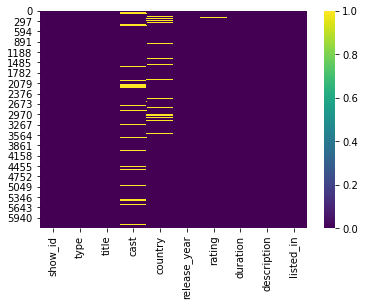

In [23]:
sns.heatmap(netflix_df.isnull(),cmap = 'viridis')
# Checking where the null values are using a heatmap

We have null values in cast,country and rating.

In [24]:
df['rating'].value_counts().unique()

array([2027, 1698,  701,  508,  286,  218,  184,  169,  149,  143,   95,
         37,    7,    2])

We don't need Director,Cast from the Dataset to visualize & sincce these two column has missing values ,so we can drop them.


In [25]:
df['country'].value_counts()

United States                                                 2032
India                                                          777
United Kingdom                                                 348
Japan                                                          176
Canada                                                         141
                                                              ... 
Canada, United States, India, United Kingdom                     1
Serbia, United States                                            1
Germany, Canada, United States                                   1
United Kingdom, Poland, United States                            1
Germany, France, Luxembourg, United Kingdom, United States       1
Name: country, Length: 554, dtype: int64

Country column is important for our Visualization & since it has some null values we can replace them by United States,Since United States has the largest nummber of shows,and Netflix was also created in United States

In [26]:
df['country'].replace(np.nan,"United States",inplace=True)

since we have release_year so we don't need year value from date_added column,But Month is important for Visualizing our data,so let's separate the month from the date_added column & replace the Null values with 0

In [27]:
netflix_df["rating"].value_counts()

TV-MA       2027
TV-14       1698
TV-PG        701
R            508
PG-13        286
NR           218
PG           184
TV-Y7        169
TV-G         149
TV-Y         143
TV-Y7-FV      95
G             37
UR             7
NC-17          2
Name: rating, dtype: int64

In [28]:
netflix_df["rating"].isnull().sum()

10

Since rating column has only 10 null values,so let's replace the null values with TV-MA since they gives the most amount of Rating

In [29]:
netflix_df["rating"].replace(np.nan,"TV-MA",inplace=True)
netflix_df.isnull().sum()

show_id           0
type              0
title             0
cast            570
country         476
release_year      0
rating            0
duration          0
description       0
listed_in         0
dtype: int64

So we successfully removed all the Null Values,Now we can visualize our Data and ask and answer questions on the data

In [30]:
import jovian

Using Jovian to commit our project time to time so we don't lose the progress

In [31]:
jovian.commit(project=project_name)

[jovian] Detected Colab notebook...
[jovian] Uploading colab notebook to Jovian...
[jovian] Capturing environment..
[jovian] Committed successfully! https://jovian.ai/ritikchawla/zerotopandas-course-project


'https://jovian.ai/ritikchawla/zerotopandas-course-project'

## Exploratory Analysis and Visualization

Before we can ask interesting questions about the neflix usage and movies of interest , it would help to understand what the ratings,duration,country would look like



Let's begin by importing`matplotlib.pyplot` and `seaborn`.

In [32]:
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

sns.set_style('darkgrid')
matplotlib.rcParams['font.size'] = 14
matplotlib.rcParams['figure.figsize'] = (9, 5)
matplotlib.rcParams['figure.facecolor'] = '#00000000'

## Number of shows and movies

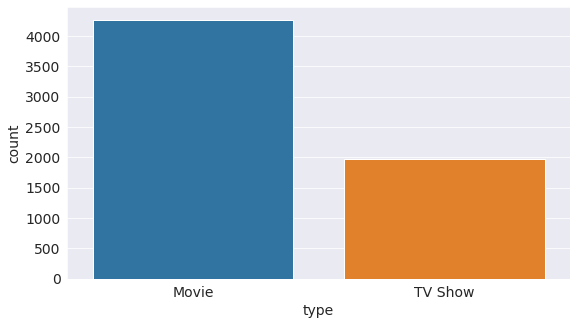

In [33]:
sns.countplot(x='type',data = netflix_df) #looking at number of Movies and TV shows

So Netflix has around 4500 Movies & almost 2000 Tv Show

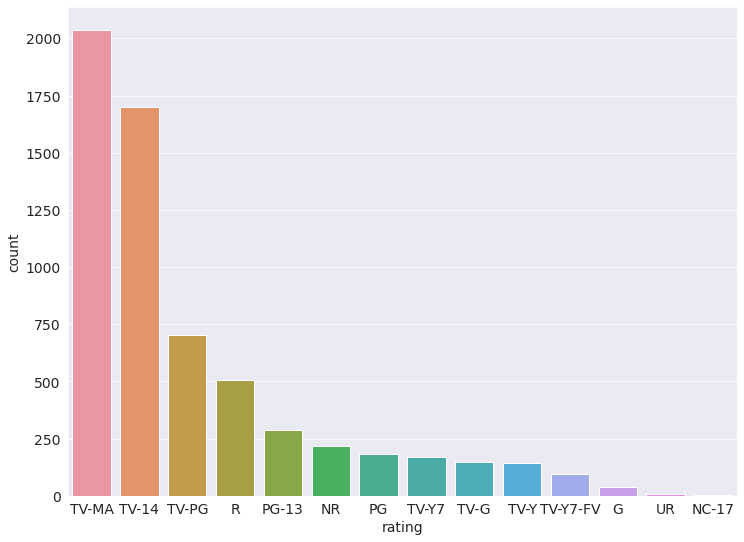

In [34]:
plt.figure(figsize=(12,9))
sns.countplot(x="rating",data=netflix_df,order= netflix_df['rating'].value_counts().index[0:14])

So most of the ratings is given by TV-MA then TV-14

## The Movie Year

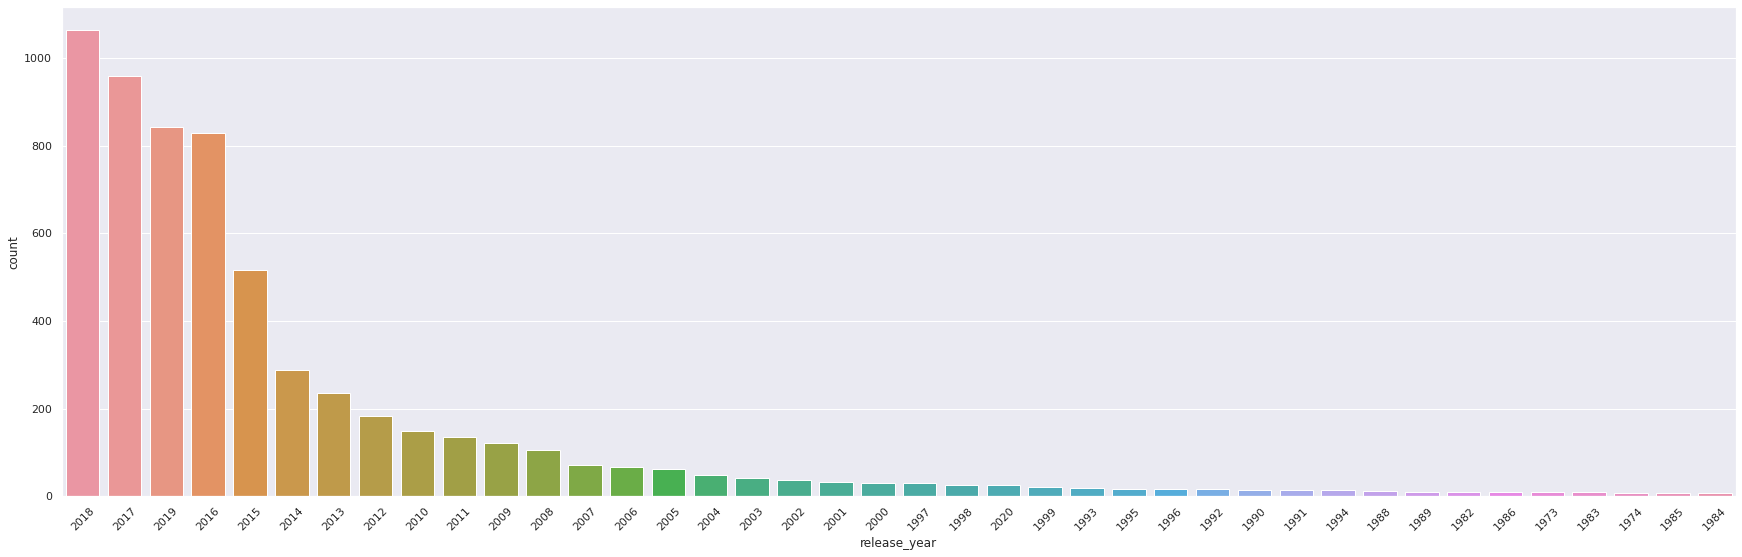

In [35]:
sns.set()
plt.figure(figsize=(30,9))
sns.countplot(x="release_year",data= netflix_df,order = netflix_df['release_year'].value_counts().index[0:40])
plt.xticks(rotation=45)
plt.show()

So total Highest number of Movies & Tv Shows has been released in the Year 2018

## Ratings between TV shows and movies

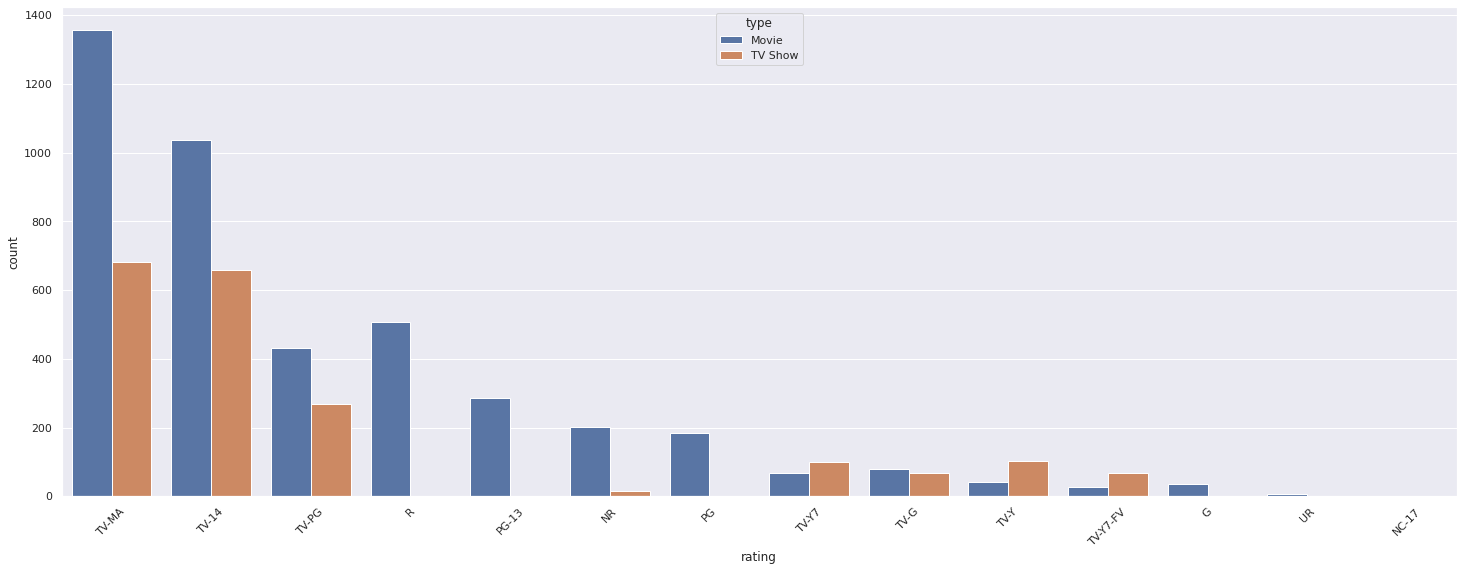

In [36]:
sns.set()
plt.figure(figsize=(25,9))
sns.countplot(x="rating",data= netflix_df,hue= "type",order = netflix_df['rating'].value_counts().index[0:15])
plt.xticks(rotation=45)
plt.show()

Both for Movies & Tv Shows TV-MA always gives the Highest number of ratings,but TV-14 almost gives the same amount of ratings for Tv-Shows as TV-MA

## Which country has most no. of releases on Netflix

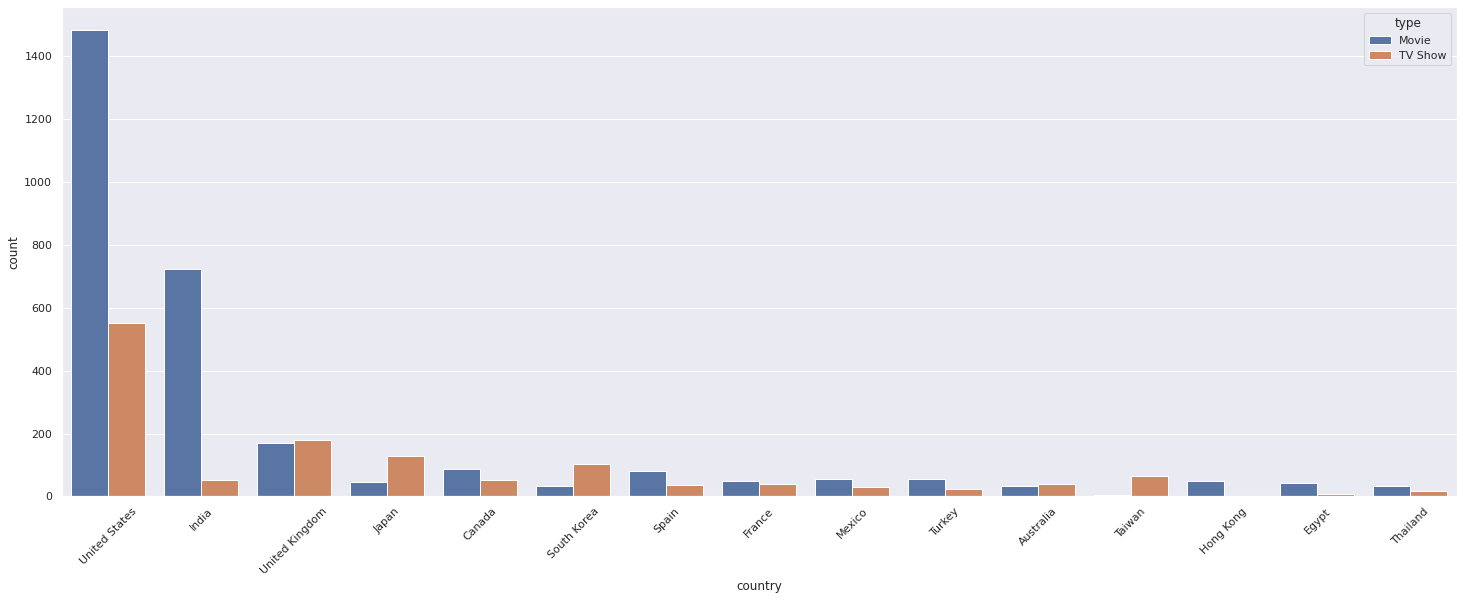

In [37]:
sns.set()
plt.figure(figsize=(25,9))
sns.countplot(x="country",data= netflix_df,hue= "type",order = netflix_df['country'].value_counts().index[0:15])
plt.xticks(rotation=45)
plt.show()

So United States provides the Highest number of Movies & Tv Shows,then at 2nd place India provides the Highest number of Movies

In [38]:
top = netflix_df['country'].value_counts()[0:8]
top.index

Index(['United States', 'India', 'United Kingdom', 'Japan', 'Canada',
       'South Korea', 'Spain', 'France'],
      dtype='object')

## Pie Chart

In [39]:
import plotly.express as px
import plotly.io as pio

In [40]:
fig = px.pie(netflix_df,values = top,names = top.index,labels= top.index)
fig.update_traces(textposition ='inside',textinfo='percent+label')
fig.show()

United States has the Highest number of Movies & Tv Shows


# Some interesting functions and libraries I discovered while researching for the project from Kaggle and towardsdatascience.com 

## Word Cloud of Country's

In [41]:
from wordcloud import WordCloud

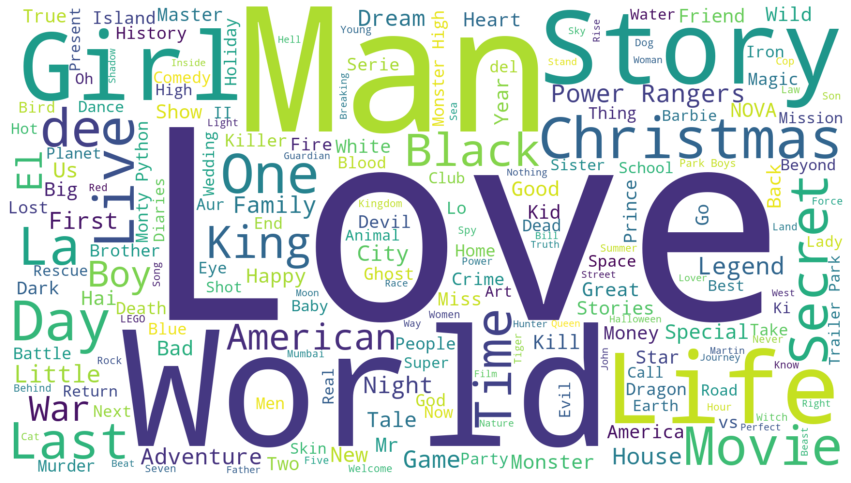

In [42]:
wordcloud = WordCloud(background_color = "white",width=1730,height=970).generate(" ".join(netflix_df.title))
plt.figure(figsize=(15,10))
plt.imshow(wordcloud,interpolation = 'bilinear')
plt.axis("off")
plt.figure(1,figsize=(12,12))
plt.show()

Let us save and upload our work to Jovian before continuing

In [43]:
import jovian

In [44]:
jovian.commit(project=project_name)

[jovian] Detected Colab notebook...
[jovian] Uploading colab notebook to Jovian...
[jovian] Capturing environment..
[jovian] Committed successfully! https://jovian.ai/ritikchawla/zerotopandas-course-project


'https://jovian.ai/ritikchawla/zerotopandas-course-project'

## Asking and Answering Questions

To complete the project objectives to ask some questions



> Steps
>

> - Answering the questions either by computing the results using Numpy/Pandas or by plotting graphs using Matplotlib/Seaborn
> - Creating new columns, merge multiple dataset and perform grouping/aggregation wherever necessary




#### Q1: Top genres in Netflix?

Text(0.5, 1.0, 'Top 10 Genres of Movies')

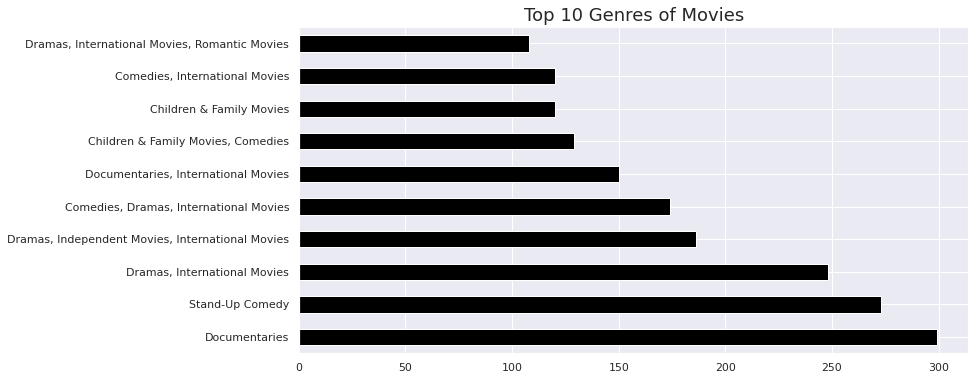

In [45]:
plt.figure(figsize=(12,6))
netflix_df[netflix_df["type"]=="Movie"]["listed_in"].value_counts()[:10].plot(kind="barh",color="black")
plt.title("Top 10 Genres of Movies",size=18)

And TV shows

Text(0.5, 1.0, 'Top 10 Genres of TV Shows')

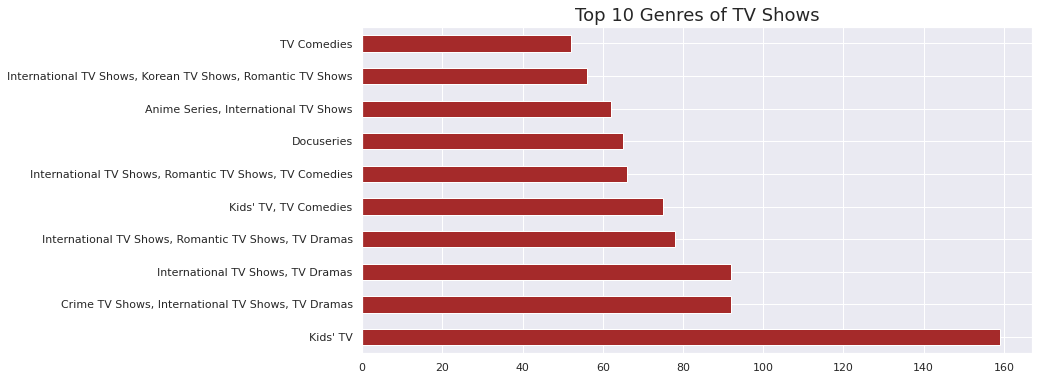

In [46]:
plt.figure(figsize=(12,6))
df[df["type"]=="TV Show"]["listed_in"].value_counts()[:10].plot(kind="barh",color="brown")
plt.title("Top 10 Genres of TV Shows",size=18)

We can look up interesting trends from this and infer really useful data about people's interests and what type of movies a person would like to watch 

#### Q2: Let's find out which genre Movies/Tv shows get's the most amount of rating , by which rating

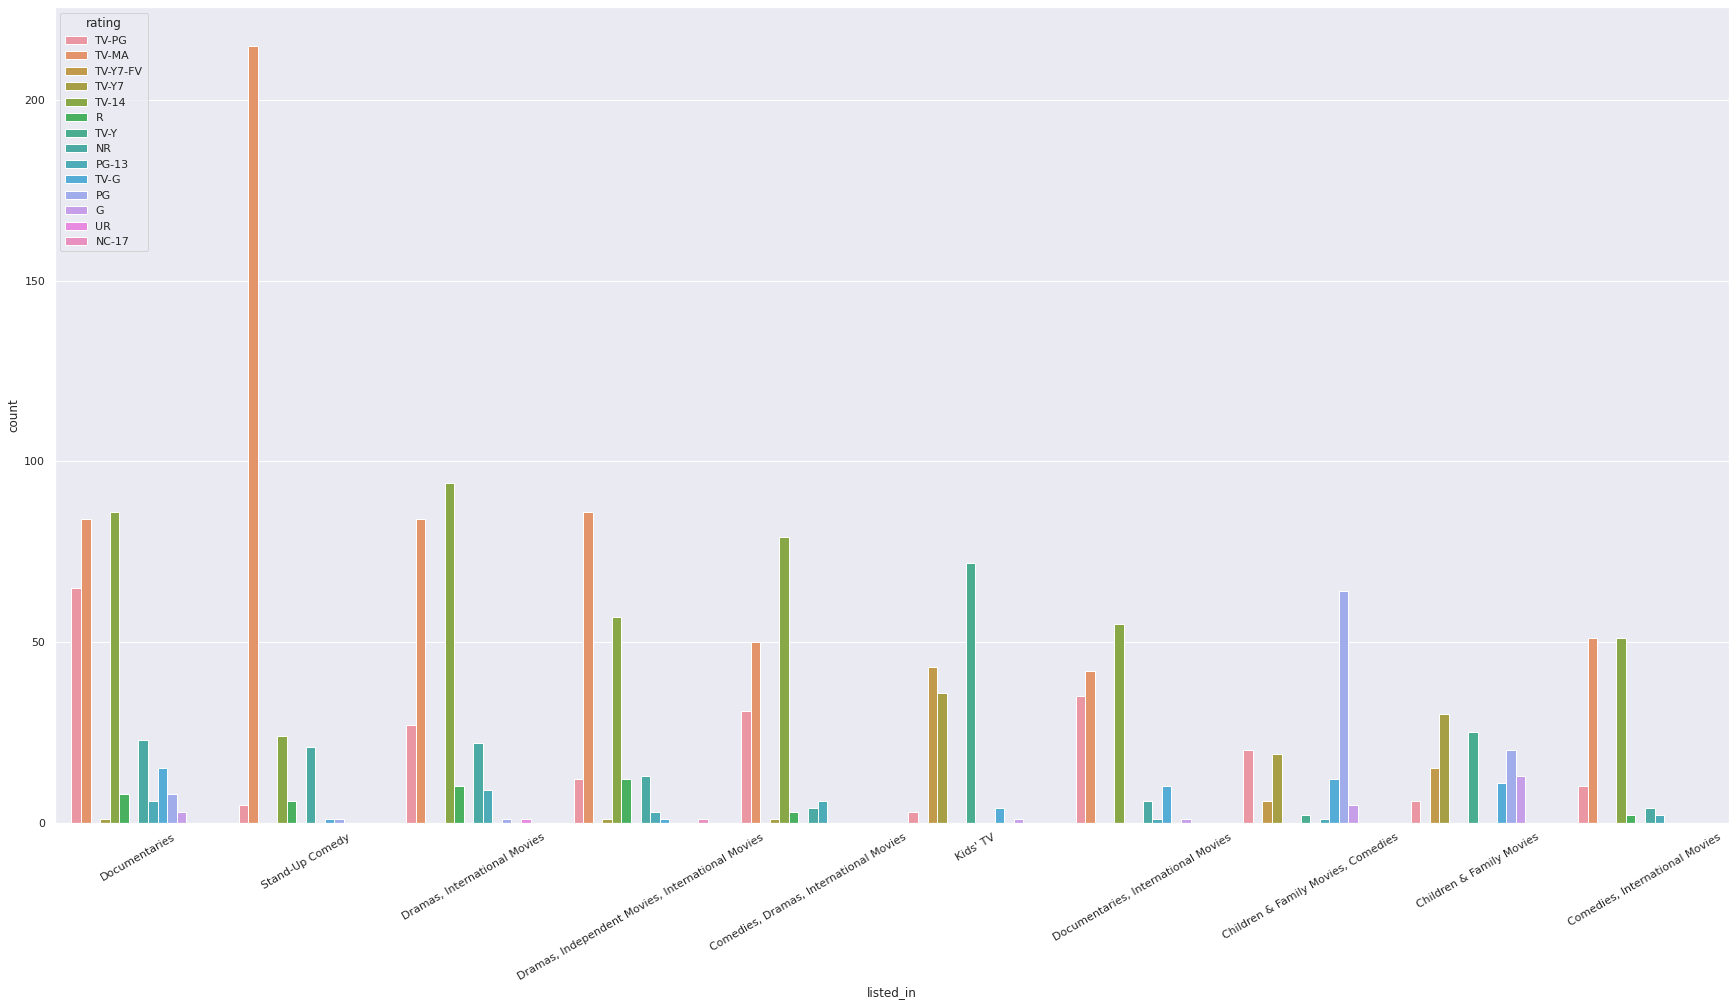

In [47]:
sns.set()
plt.figure(figsize=(30,15))
sns.countplot(x='listed_in',hue='rating',data = netflix_df,order =netflix_df["listed_in"].value_counts().index[0:10])
plt.xticks(rotation = 30)
plt.show()

Drama type movies are mostly rated by TV-14 & Most of the Stand Up Comedy are rated by TV-MA

Standup Comedy shows on Netflix

In [48]:
tag = "Stand-Up Comedy" #standup shows on Netflix
netflix_df["relevant"] = netflix_df['listed_in'].fillna("").apply(lambda x : 1 if tag.lower() in x.lower() else 0)
com = netflix_df[netflix_df["relevant"] == 1]
com[com["country"] == "United States"][["title", "country","release_year"]].head(10)

,title,country,release_year
53,Marc Maron: Too Real,United States,2017
113,Def Comedy Jam 25,United States,2017
126,Jeff Dunham: Beside Himself,United States,2019
134,Iliza Shlesinger: Confirmed Kills,United States,2016
181,Jerry Before Seinfeld,United States,2017
202,Sebastian Maniscalco: What's Wrong with People?,United States,2012
210,Cedric the Entertainer: Live from the Ville,United States,2016
260,Norm Macdonald Has a Show,United States,2018
288,Jeff Dunham: Relative Disaster,United States,2017
289,Daniel Sloss: Live Shows,United States,2018


#### Q3: Which is the oldest movie on Netflix

In [49]:
old = netflix_df.sort_values("release_year",ascending=True)
old[["title","type","country","release_year"]].head(20)


,title,type,country,release_year
4292,Pioneers: First Women Filmmakers*,TV Show,NaN,1925
2011,Prelude to War,Movie,United States,1942
2013,The Battle of Midway,Movie,United States,1942
2022,Undercover: How to Operate Behind Enemy Lines,Movie,United States,1943
2023,Why We Fight: The Battle of Russia,Movie,United States,1943
2026,WWII: Report from the Aleutians,Movie,United States,1943
2017,The Memphis Belle: A Story of a\nFlying Fortress,Movie,United States,1944
2019,The Negro Soldier,Movie,United States,1944
2021,Tunisian Victory,Movie,"United States, United Kingdom",1944
2012,San Pietro,Movie,United States,1945


All of the oldest Movies & TV Shows on Netflix are from United States

So what about kids shows

In [50]:
kids_show=netflix_df[netflix_df["listed_in"] == "Kids' TV"].reset_index()
kids_show[["title","country","release_year"]].head(10)

,title,country,release_year
0,Transformers Prime,United States,2013
1,Transformers: Robots in Disguise,United States,2016
2,Ben 10,United States,2016
3,Hilda,"United Kingdom, Canada, United States",2018
4,Kulipari: An Army of Frogs,United States,2016
5,Transformers: Rescue Bots,"Canada, United States",2016
6,Super Monsters Monster Party,NaN,2018
7,Loo Loo Kids: Johny & Friends Musical Adventures,NaN,2016
8,Transformers Rescue Bots Academy,United States,2019
9,Transformers: Cyberverse,NaN,2018


So most of the kids shows are from United States 

#### Q4: Analysis whether individual countries have movies or not on Netflix

In [51]:
netflix_df[netflix_df["country"] == "Pakistan"]

,show_id,type,title,cast,country,release_year,rating,duration,description,listed_in,relevant
55,81160036,Movie,Saawan,"Karam Hussain, Arif Bahlim, Najiba Faiz, Salee...",Pakistan,2016,TV-14,128 min,Outcast from society and left to die in the wi...,"Dramas, Independent Movies, International Movies",0
243,80142637,Movie,Janaan,"Armeena Rana Khan, Bilal Ashraf, Ali Rehman Kh...",Pakistan,2016,TV-14,132 min,"After 11 years in Canada, young Meena returns ...","Comedies, Dramas, International Movies",0
919,81024705,Movie,Zindagi Kitni Haseen Hay,"Feroze Khan, Sajal Ali, Jibrayl Ahmed Rajput, ...",Pakistan,2016,TV-14,126 min,Two young parents struggle to keep their marri...,"Dramas, International Movies, Romantic Movies",0
1742,81110388,Movie,7 Din Mohabbat In,"Mahira Khan, Sheheryar Munawar, Javed Sheikh, ...",Pakistan,2018,TV-PG,137 min,Given just seven days by a genie to find a gir...,"Comedies, International Movies, Music & Musicals",0
1757,80994418,Movie,Chalay Thay Saath,"Syra Shehroz, Kent S. Leung, Osama Tahir, Mans...",Pakistan,2017,TV-14,118 min,Beautiful and adventurous doctor Resham meets ...,"Comedies, Dramas, International Movies",0
2329,80175151,Movie,Balu Mahi,"Osman Khalid Butt, Ainy Jaffri, Sadaf Kanwal, ...",Pakistan,2017,TV-14,149 min,Determined to stop his ex-girlfriend from marr...,"International Movies, Romantic Movies",0
3146,80094964,Movie,Ho Mann Jahaan,"Adeel Hussain, Mahira Khan, Sheheryar Munawar,...",Pakistan,2015,TV-PG,170 min,Three friends in modern-day Karachi navigate t...,"Dramas, International Movies, Romantic Movies",0
3160,80187467,Movie,Waar,"Shaan Shahid, Shamoon Abbasi, Ayesha Khan, Mee...",Pakistan,2013,TV-MA,130 min,When Pakistani authorities learn of a looming ...,"Action & Adventure, International Movies",0
3162,80187323,Movie,Wrong No.,"Javed Sheikh, Danish Taimoor, Janita Asma, Nay...",Pakistan,2015,TV-14,133 min,Two identical strangers pursue their respectiv...,"Comedies, International Movies, Romantic Movies",0
3385,81047445,Movie,"Abdullah, The Final Witness","Sajid Hasan, Hameed Sheikh, Habibullah Panezai...",Pakistan,2016,TV-14,88 min,"Inspired by real events, this drama follows a ...","Dramas, International Movies",0


In [52]:
netflix_df[netflix_df["country"] == "Bhutan"]

,show_id,type,title,cast,country,release_year,rating,duration,description,listed_in,relevant


Well not Bhutan , Okay!!

Now Total shows from Individual Countries

In [53]:
Country = pd.DataFrame(netflix_df["country"].value_counts().reset_index().values,columns=["country","TotalShows"])
Country.head()

,country,TotalShows
0,United States,2032
1,India,777
2,United Kingdom,348
3,Japan,176
4,Canada,141


#### Q5: Frequency of Movies which were released in different years and are available on Netflix

An Interesting analysis with an interesting library

Text(0.5, 1.0, 'Frequency of Movies which were released in different years and are available on Netflix')

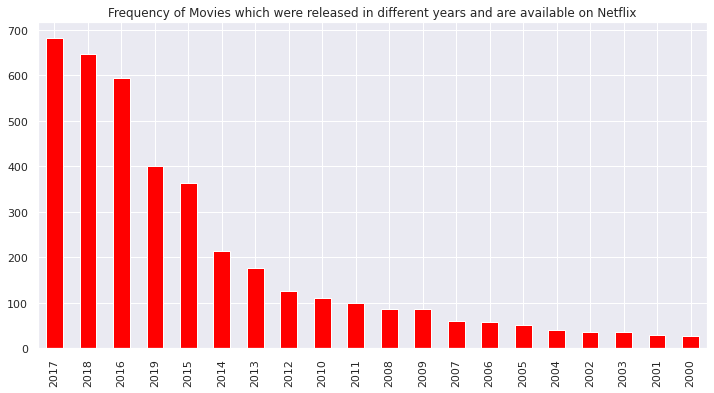

In [54]:
plt.figure(figsize=(12,6))
netflix_df[netflix_df["type"]=="Movie"]["release_year"].value_counts()[:20].plot(kind="bar",color="Red")
plt.title("Frequency of Movies which were released in different years and are available on Netflix")

And shows

Text(0.5, 1.0, 'Frequency of TV shows which were released in different years and are available on Netflix')

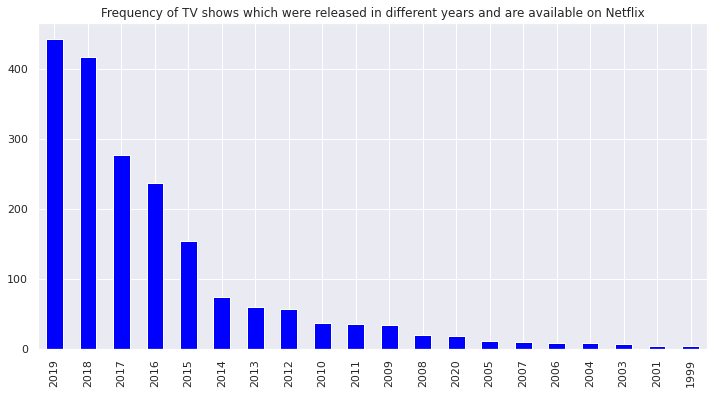

In [55]:
plt.figure(figsize=(12,6))
df[df["type"]=="TV Show"]["release_year"].value_counts()[:20].plot(kind="bar",color="Blue")
plt.title("Frequency of TV shows which were released in different years and are available on Netflix")

Let us save and upload our work to Jovian before continuing.

In [56]:
import jovian

In [57]:
jovian.commit(project=project_name)

[jovian] Detected Colab notebook...
[jovian] Uploading colab notebook to Jovian...
[jovian] Capturing environment..
[jovian] Committed successfully! https://jovian.ai/ritikchawla/zerotopandas-course-project


'https://jovian.ai/ritikchawla/zerotopandas-course-project'

## Inferences and Conclusion

We've drawn many interesting inferences from the survey, here's a summary of the few of them

1. United States contribute to most viewers and content     followed by India
2. A trend for Comedy shows and Movies is infered
3. Kids TV shows attract a lot of viewers indicating young children are using Netflix
4. Netflix contains all timeline movies from 1925 to the present date thereby making it one of the most OTT platform today




In [ ]:
import jovian

In [ ]:
jovian.commit()

<IPython.core.display.Javascript object>

[jovian] Attempting to save notebook..
[jovian] Updating notebook "aakashns/zerotopandas-course-project-starter" on https://jovian.ml/
[jovian] Uploading notebook..
[jovian] Capturing environment..
[jovian] Committed successfully! https://jovian.ml/aakashns/zerotopandas-course-project-starter


'https://jovian.ml/aakashns/zerotopandas-course-project-starter'

## References and Future Work
Further I would continue making conclusions related to individual country and divide the viewers segment.

In [58]:
import jovian

In [60]:
jovian.commit(project=project_name)

[jovian] Detected Colab notebook...
[jovian] Uploading colab notebook to Jovian...
[jovian] Capturing environment..
[jovian] Committed successfully! https://jovian.ai/ritikchawla/zerotopandas-course-project


'https://jovian.ai/ritikchawla/zerotopandas-course-project'